# Importing Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
!pip install ydata_profiling
import ydata_profiling as yd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Importing dataset

In [2]:
file_path = r'C:\Users\torjm\OneDrive\Bureau\coding_folder\Axe finance stage\CC GENERAL.csv'
df = pd.read_csv(file_path)

In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
dt=df[['CUST_ID','BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','TENURE']]

# EDA

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.0,0.000000,0.000000,0.222222,1.50000


In [7]:
# Add a column to represent the customer type
dt['Customer_Type'] = ''
dt.loc[(dt['ONEOFF_PURCHASES_FREQUENCY'] > 0) & (dt['PURCHASES_INSTALLMENTS_FREQUENCY'] == 0), 'Customer_Type'] = 'One-off Purchases'
dt.loc[(dt['ONEOFF_PURCHASES_FREQUENCY'] == 0) & (dt['PURCHASES_INSTALLMENTS_FREQUENCY'] >0), 'Customer_Type'] = 'Installments purchases'
dt.loc[(dt['ONEOFF_PURCHASES_FREQUENCY'] > 0) & (dt['PURCHASES_INSTALLMENTS_FREQUENCY'] > 0), 'Customer_Type'] = 'Both'
dt.loc[(dt['ONEOFF_PURCHASES_FREQUENCY'] == 0) & (dt['PURCHASES_INSTALLMENTS_FREQUENCY'] == 0), 'Customer_Type'] = 'None'
customer_type_counts = dt['Customer_Type'].value_counts()
customer_type_counts

C:\Users\torjm\AppData\Local\Temp\ipykernel_8528\3228911060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Customer_Type'] = ''


Both                      2774
Installments purchases    2261
None                      2041
One-off Purchases         1874
Name: Customer_Type, dtype: int64

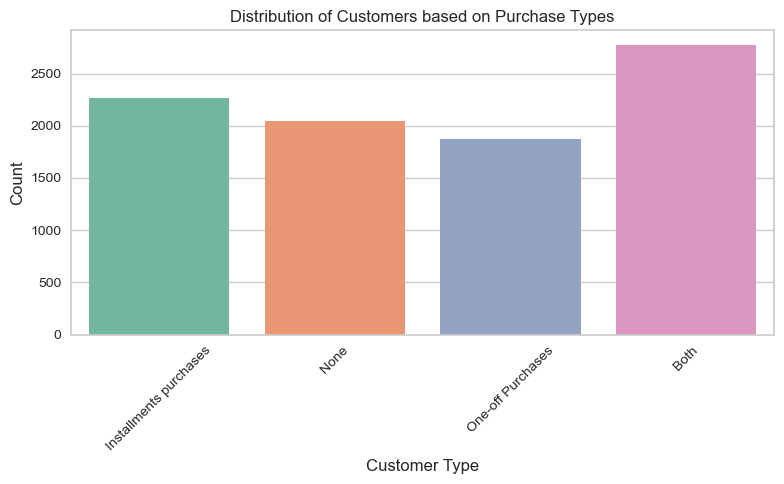

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dt, x='Customer_Type', palette='Set2')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customers based on Purchase Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

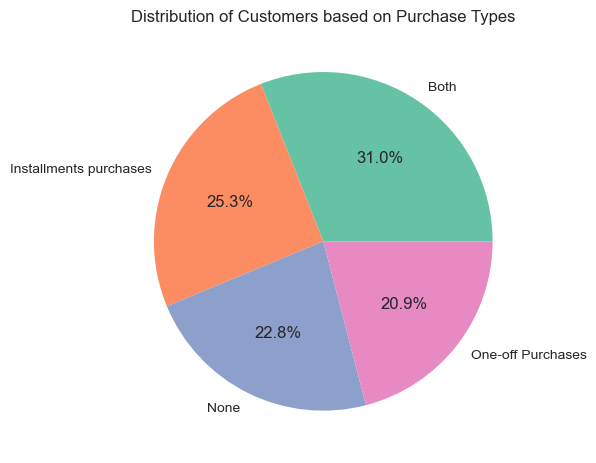

In [9]:
# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Customers based on Purchase Types')
plt.tight_layout()
plt.show()

In [10]:
replacements = {
    'One-off Purchases': 0,
    'Installments purchases': 1,
    'Both': 2,
    'None':3
    }
dt['Customer_Type'] = dt['Customer_Type'].replace(replacements)

C:\Users\torjm\AppData\Local\Temp\ipykernel_8528\1894604352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Customer_Type'] = dt['Customer_Type'].replace(replacements)


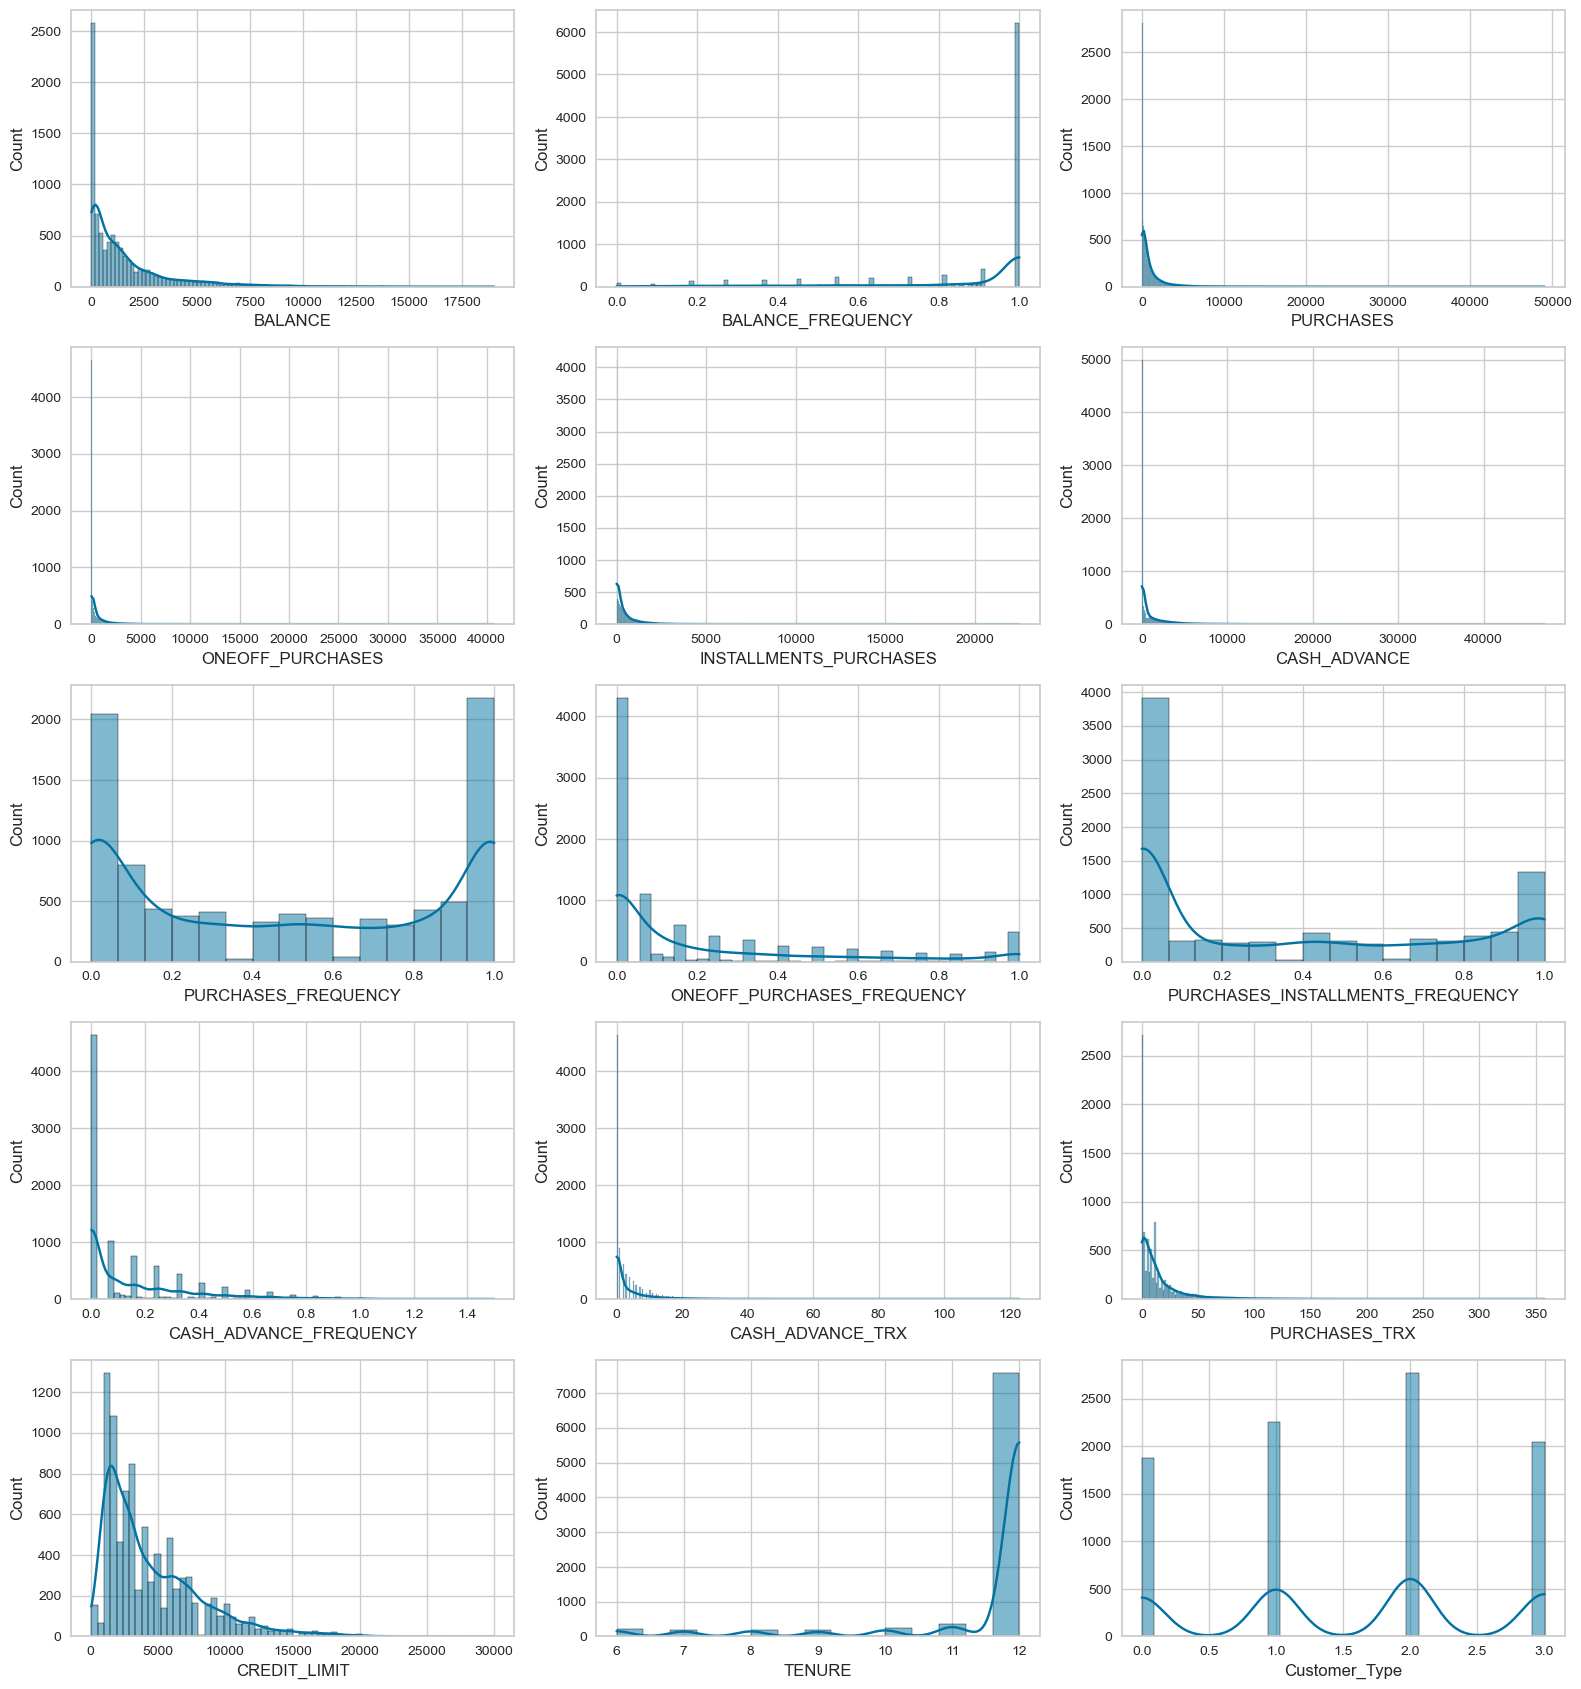

In [11]:
#features distribution 
num_cols = dt.select_dtypes(exclude="object").columns.tolist()
fig = plt.figure(figsize=(16, 20))
for i, col in enumerate(num_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(data=dt, x=col, kde=True)

fig.tight_layout()
plt.show()

-Almost all features are right skewed

-Most people don't make purchases at all

-Most people have a low amount of money in their accounts and a low credit limit

-12 months tenure is preferable for most users

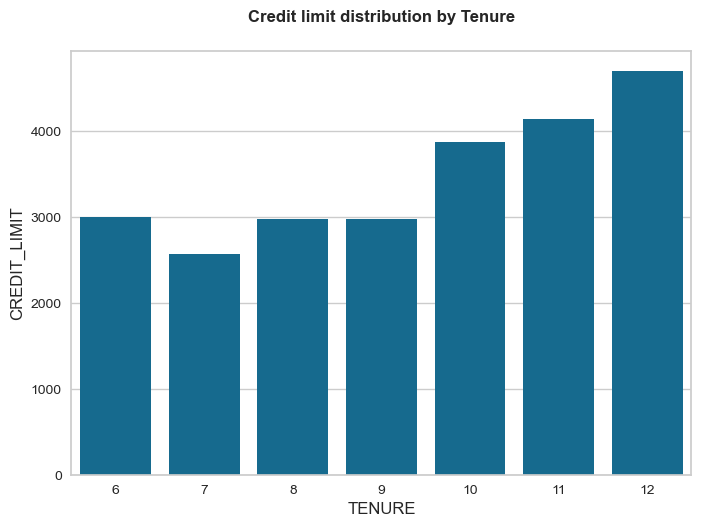

In [12]:
title = dict(fontweight="heavy", fontfamily="arial", y=1.05)

fig, ax = plt.subplots()
sns.barplot(data=dt, x="TENURE", y="CREDIT_LIMIT", errorbar=None, color="C0", ax=ax)
ax.set_title("Credit limit distribution by Tenure", **title)

plt.show()

People with higher average credit limit have a higher tenure.

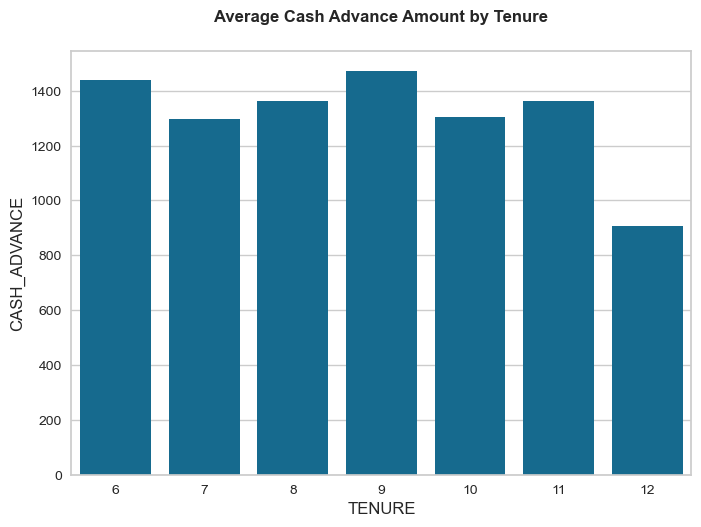

In [13]:
title = dict(fontweight="heavy", fontfamily="arial", y=1.05)
fig, ax = plt.subplots()
sns.barplot(data=dt, x="TENURE", y="CASH_ADVANCE", errorbar=None, color="C0", ax=ax)
ax.set_title("Average Cash Advance Amount by Tenure", **title)
plt.show()

Credit card users with 12-months of tenure have the lowest average cash advance payment amount compared to other tenure users.

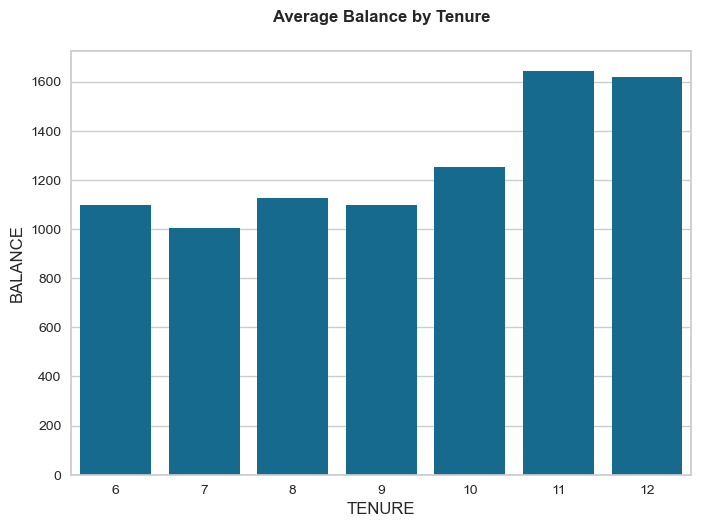

In [14]:
title = dict(fontweight="heavy", fontfamily="arial", y=1.05)
fig, ax = plt.subplots()
sns.barplot(data=dt, x="TENURE", y="BALANCE", errorbar=None, color="C0", ax=ax)
ax.set_title("Average Balance by Tenure", **title)
plt.show()

 Customers with average balances over 1,500 have tenures of between 11 to 12-months.

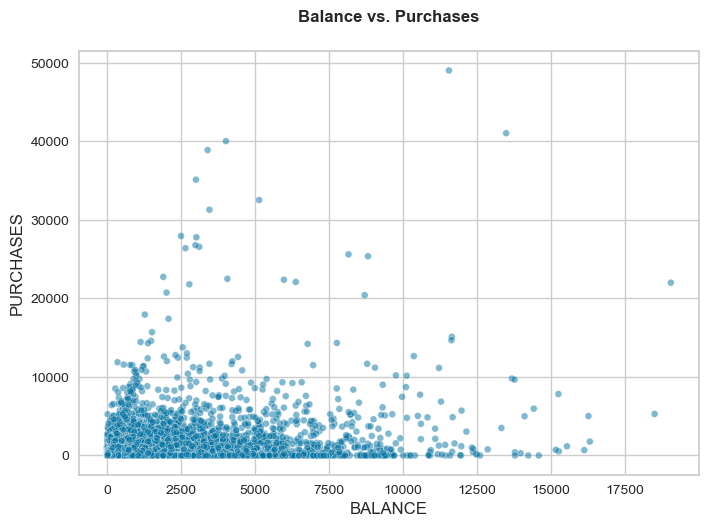

In [15]:
#scatterplot
sns.scatterplot(data=df, x="BALANCE", y="PURCHASES", size=0.5, legend=None, alpha=0.5)
plt.title("Balance vs. Purchases", **title)

plt.show()

Even if user has a lot of money, they won't make an expensive purchase.

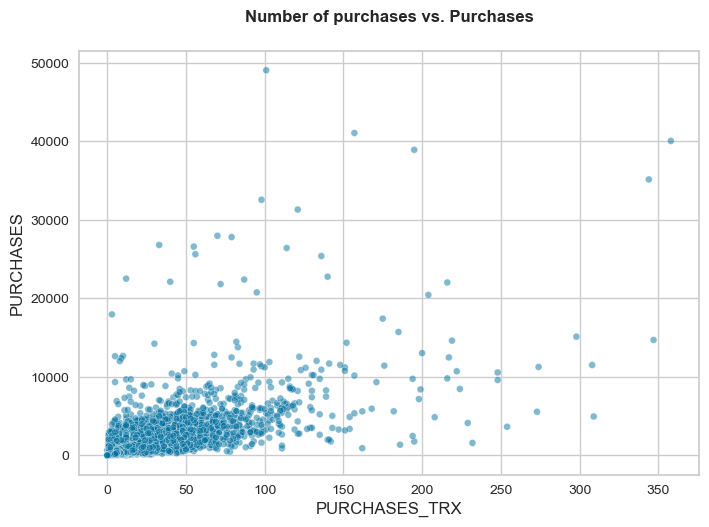

In [16]:
sns.scatterplot(data=df, x="PURCHASES_TRX", y="PURCHASES", size=0.5, legend=None, alpha=0.5)
plt.title("Number of purchases vs. Purchases", **title)

plt.show()

This plot shows us that these two features are strongly correlated, as expected. People who buy more, spend more.

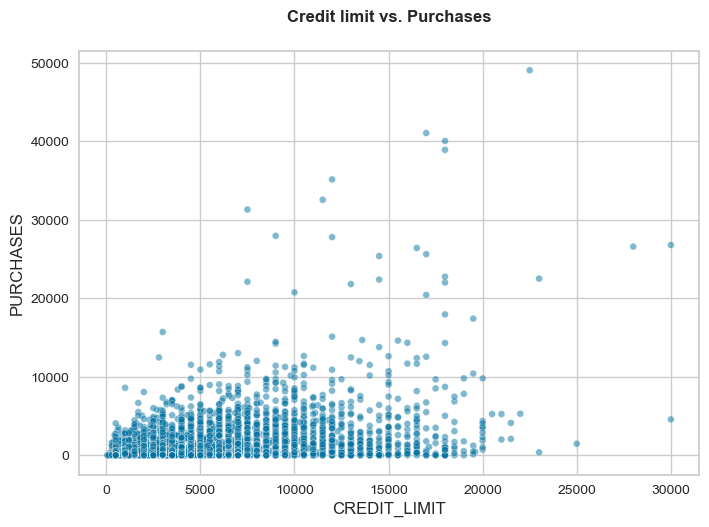

In [17]:
sns.scatterplot(data=df, x="CREDIT_LIMIT", y="PURCHASES", size=0.5, legend=None, alpha=0.5)
plt.title("Credit limit vs. Purchases", **title)

plt.show()

People with higher credit limits have a tendency to make more purchases.

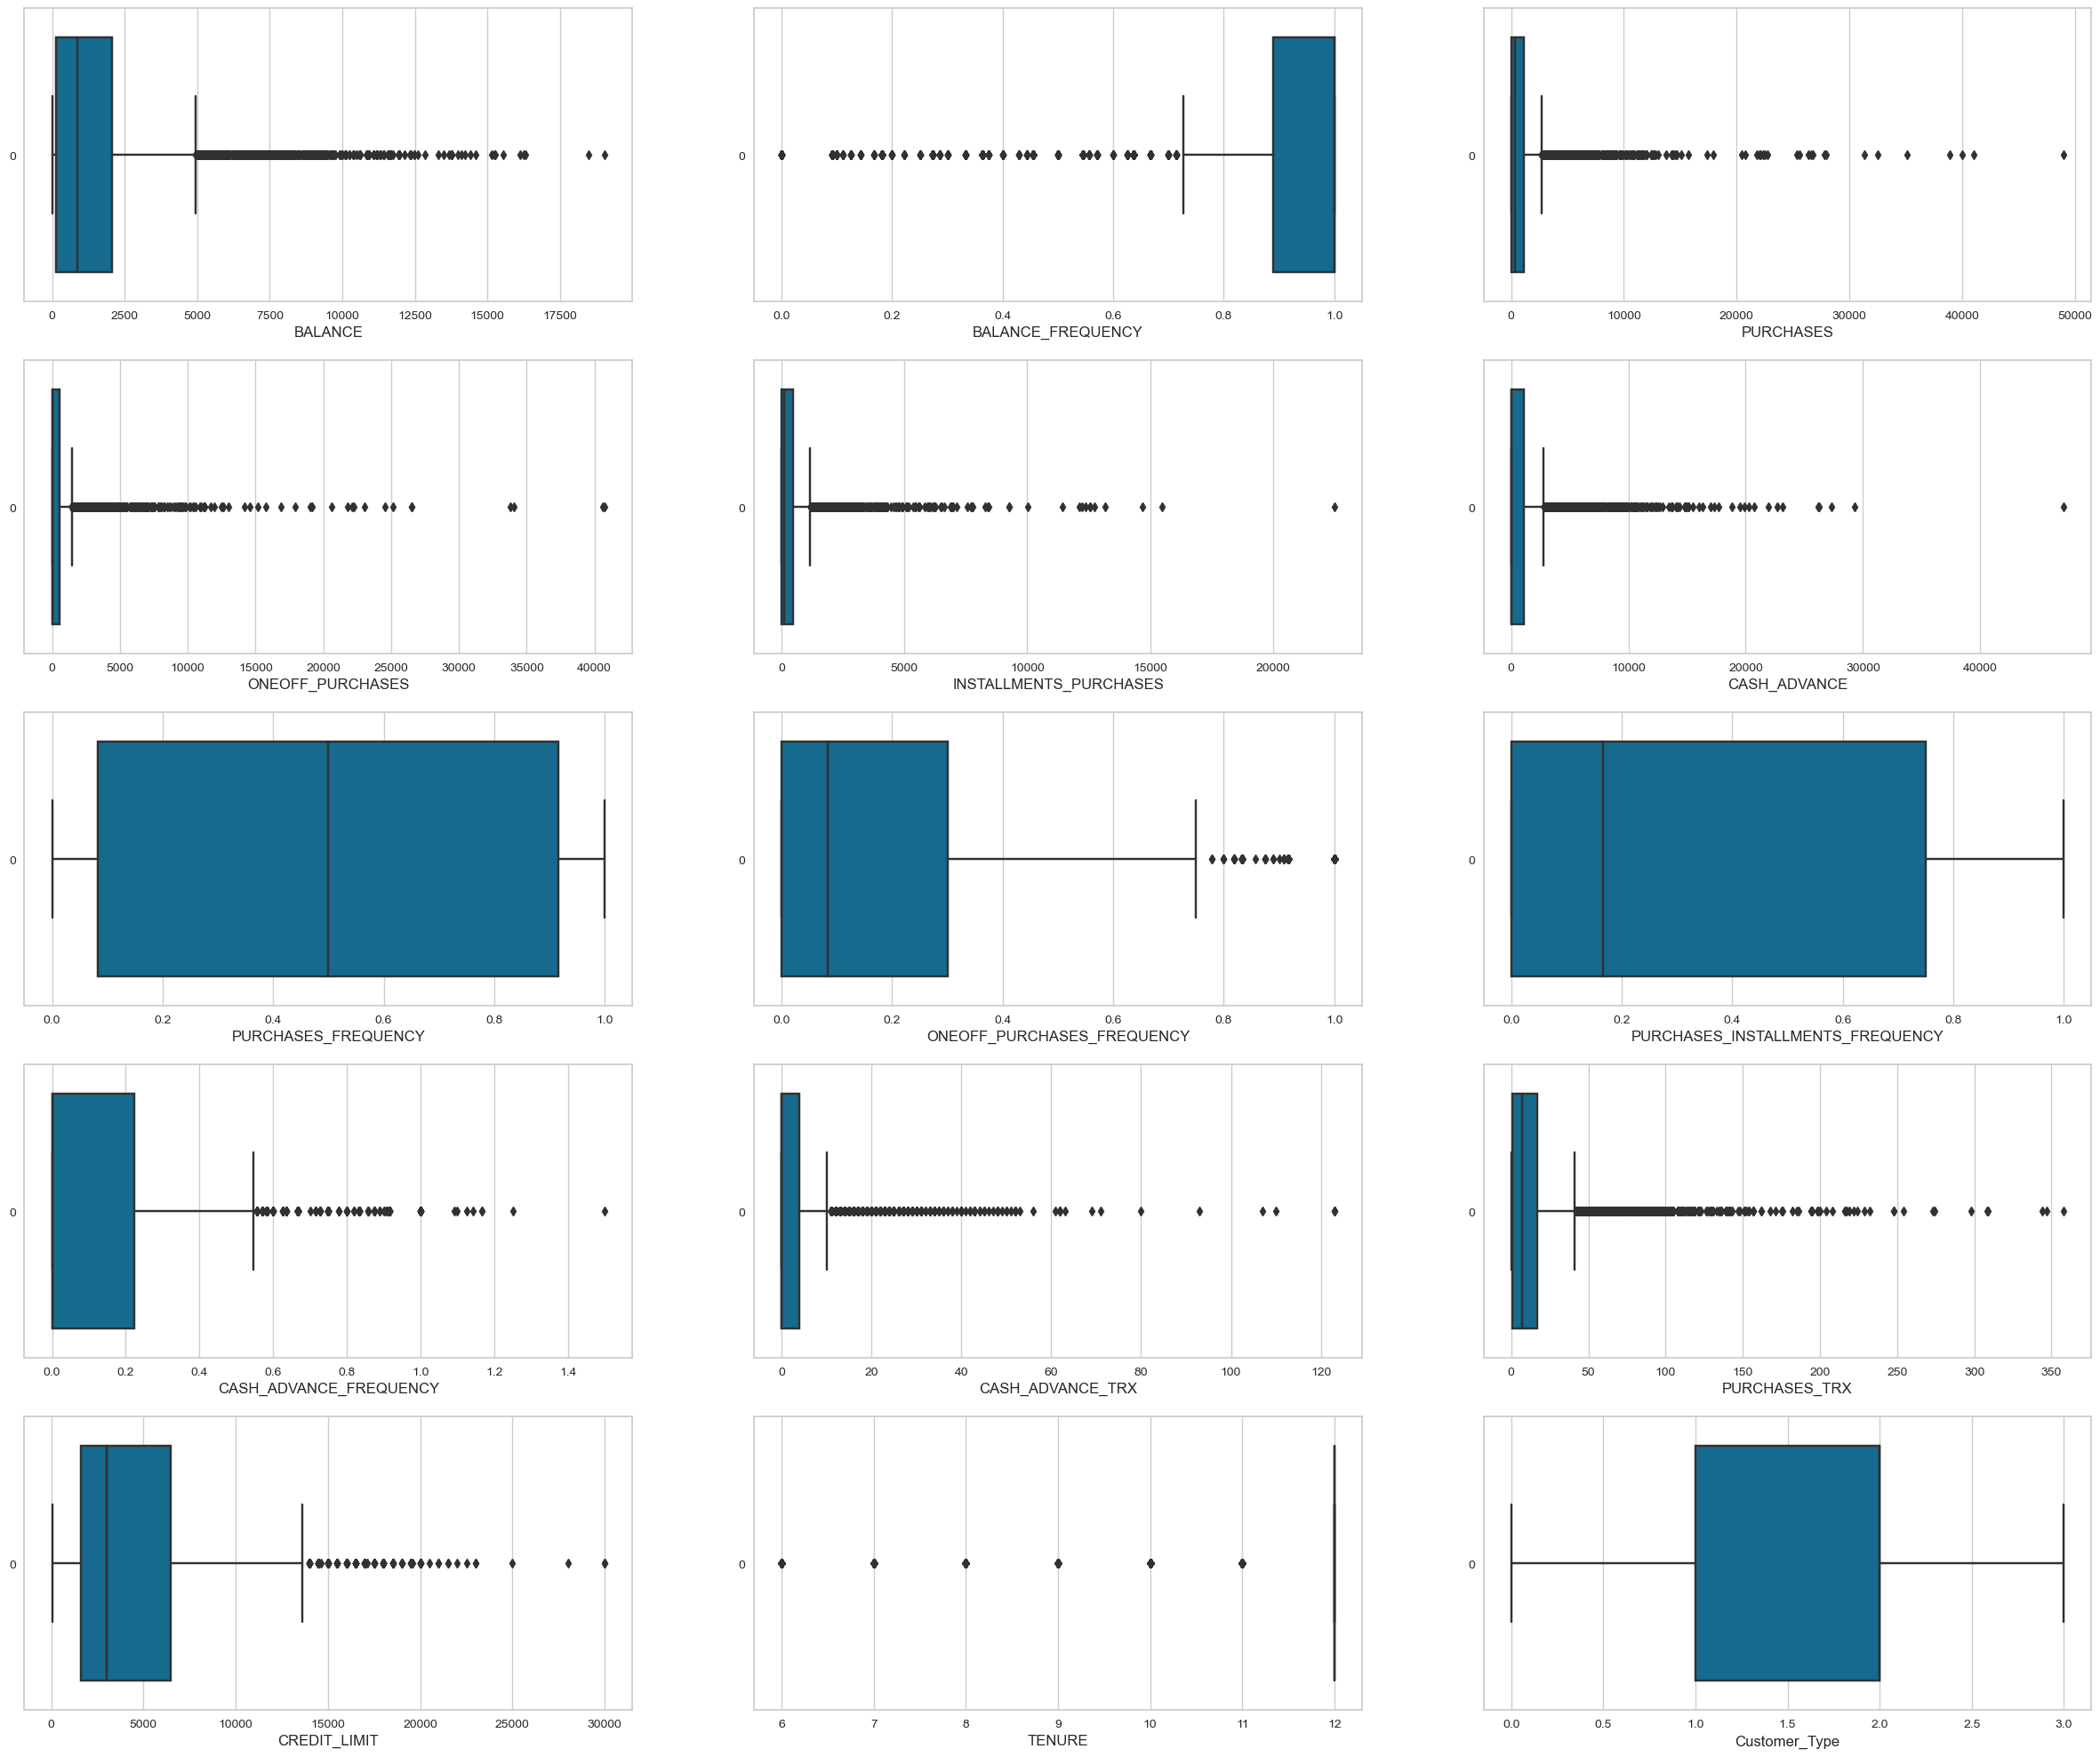

In [18]:
#Boxplot 
n_cols = 3
n_rows = (len(dt.columns) - 1) // n_cols + 1

plt.figure(figsize=(30,30))
for i, col in enumerate( dt.select_dtypes(include=[np.number]).columns):
    ax = plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(dt[col], ax=ax,orient='h')
    plt.xlabel(col)
plt.show()

-As we see there is values greater than 1 in cash_advance_frequency 

-Some features have outliers except PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY and CUSTOMER_TYPE

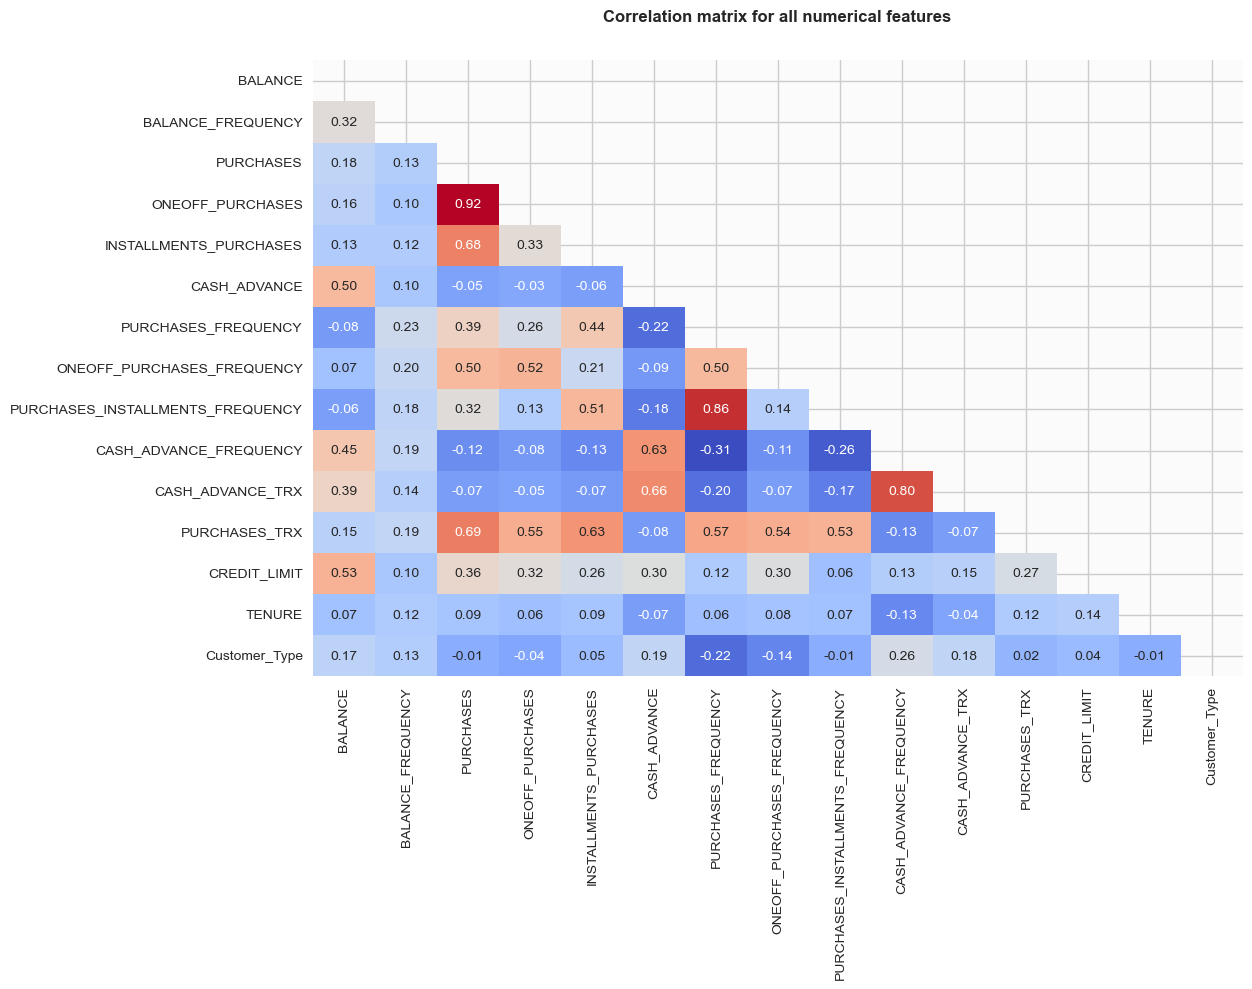

In [19]:
#heatmap (correlation)
numerical_features = dt.select_dtypes(include=['float64', 'int64'])
mask = np.triu(np.ones_like(numerical_features.corr(), dtype=bool))
plt.figure(figsize=(12,8))
ax = sns.heatmap(numerical_features.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False, mask=mask, annot_kws={"size":10})
ax.set_title("Correlation matrix for all numerical features", **title)
ax.set_facecolor("#FBFBFB")
plt.show()

-High correlation between ONEOFF_PURCHASES & PURCHASES

-High correlation between PURCHASES_INSTALLMENTS_FREQUENCY & PURCHASES_FREQUENCY

-High correlation between CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX

In [20]:
#yd.ProfileReport(dt)

In [21]:
(((dt['ONEOFF_PURCHASES']+dt['INSTALLMENTS_PURCHASES']-dt['PURCHASES'])//1)>0.05).mean()

0.002122905027932961

We have some rows in which 'ONEOFF_PURCHASES'+'INSTALLMENTS_PURCHASES'-'PURCHASES'!=0 , whe should deal with them.

In [22]:
dt[(dt['CASH_ADVANCE_TRX']==0)&(dt['CASH_ADVANCE']!=0)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,TENURE,Customer_Type


In [23]:
dt[(dt['PURCHASES_TRX']==0)&(dt['PURCHASES']!=0)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,TENURE,Customer_Type
1458,C11506,4.382924,0.272727,130.24,0.00,152.24,0.0,0.083333,0.000000,0.083333,0.0,0,0,14000.0,12,1
3590,C13691,1.869435,0.454545,0.24,0.24,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,0,3000.0,12,0
4497,C14622,72.425884,1.000000,655.68,0.00,655.68,0.0,1.000000,0.000000,1.000000,0.0,0,0,1000.0,12,1


We have 3 rows in which PURCHASES_TRX==0 and PURCHASES!=0

In [24]:
dt.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
TENURE                              0
Customer_Type                       0
dtype: int64

We have null value in CREDIT_LIMIT in one row we should deal with it

# Preprocessing

**Dealing with missing values and illogical rows**

In [25]:
dt_drop=dt[(abs(dt['ONEOFF_PURCHASES']+dt['INSTALLMENTS_PURCHASES']-dt['PURCHASES'])//1)!=0]

In [26]:
dt_drop.shape

(19, 16)

In [27]:
dt=dt.drop(dt_drop.index)

In [28]:
y=dt[(dt['PURCHASES_TRX']==0)&(dt['PURCHASES']!=0)]
dt=dt.drop(y.index)

In [29]:
y.shape

(2, 16)

In [30]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8929 non-null   object 
 1   BALANCE                           8929 non-null   float64
 2   BALANCE_FREQUENCY                 8929 non-null   float64
 3   PURCHASES                         8929 non-null   float64
 4   ONEOFF_PURCHASES                  8929 non-null   float64
 5   INSTALLMENTS_PURCHASES            8929 non-null   float64
 6   CASH_ADVANCE                      8929 non-null   float64
 7   PURCHASES_FREQUENCY               8929 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8929 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8929 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8929 non-null   float64
 11  CASH_ADVANCE_TRX                  8929 non-null   int64  
 12  PURCHA

In [31]:
dt=dt.dropna()

In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8928 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8928 non-null   object 
 1   BALANCE                           8928 non-null   float64
 2   BALANCE_FREQUENCY                 8928 non-null   float64
 3   PURCHASES                         8928 non-null   float64
 4   ONEOFF_PURCHASES                  8928 non-null   float64
 5   INSTALLMENTS_PURCHASES            8928 non-null   float64
 6   CASH_ADVANCE                      8928 non-null   float64
 7   PURCHASES_FREQUENCY               8928 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8928 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8928 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8928 non-null   float64
 11  CASH_ADVANCE_TRX                  8928 non-null   int64  
 12  PURCHA

In [33]:
dt[dt['CASH_ADVANCE_FREQUENCY']>1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,TENURE,Customer_Type
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,8,0
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,6,0
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,8,0
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,10,0
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,6,3
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,6,3
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,11,0
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,7,3


In [34]:
max_allowed_frequency = 1
dt['CASH_ADVANCE_FREQUENCY'] = dt['CASH_ADVANCE_FREQUENCY'].apply(lambda x: min(x, max_allowed_frequency))

In [35]:
dt = dt.drop(columns=['Customer_Type'])
df_copy=dt.copy()
#df_copy.to_csv(r'C:\Users\torjm\OneDrive\Bureau\project\reactproject\Customer.csv', index=False)

In [36]:
df_copy.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'TENURE'],
      dtype='object')

In [37]:
df_copy.shape

(8928, 15)

**Dealing with Skewed data**

In [38]:
from sklearn.preprocessing import QuantileTransformer
cols_right_skewed = df_copy.skew(numeric_only=True)[df_copy.skew(numeric_only=True) > 1].index.tolist()
cols_left_skewed = df_copy.skew(numeric_only=True)[df_copy.skew(numeric_only=True) < -1].index.tolist()
print('Right skewed columns: ', cols_right_skewed)
print('Left skewed columns: ', cols_left_skewed)

columns_to_transform = cols_right_skewed + cols_left_skewed
print(columns_to_transform)
pt = QuantileTransformer(n_quantiles=100, output_distribution='normal')
transformed_data = pd.DataFrame(pt.fit_transform(df_copy[columns_to_transform]),
                                columns= columns_to_transform)

df_copy[columns_to_transform] = transformed_data

Right skewed columns:  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT']
Left skewed columns:  ['BALANCE_FREQUENCY', 'TENURE']
['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'BALANCE_FREQUENCY', 'TENURE']


In [39]:
# test
dt_skew = dt.skew(numeric_only=True).to_frame(name='skewness before')
df_copy_skew = df_copy.skew(numeric_only=True).to_frame(name='skewness after Quantile Transormer')
combined_df = pd.concat([dt_skew, df_copy_skew], axis=1)
combined_df

,skewness before,skewness after Quantile Transormer
BALANCE,2.391287,-0.827470
BALANCE_FREQUENCY,-2.026357,-0.936492
PURCHASES,8.143317,-1.035123
ONEOFF_PURCHASES,10.039302,-0.014152
INSTALLMENTS_PURCHASES,7.315757,-0.173390
CASH_ADVANCE,5.163566,0.122527
PURCHASES_FREQUENCY,0.060242,0.060242
ONEOFF_PURCHASES_FREQUENCY,1.532879,0.305589
PURCHASES_INSTALLMENTS_FREQUENCY,0.509941,0.509941
CASH_ADVANCE_FREQUENCY,1.787242,0.150973


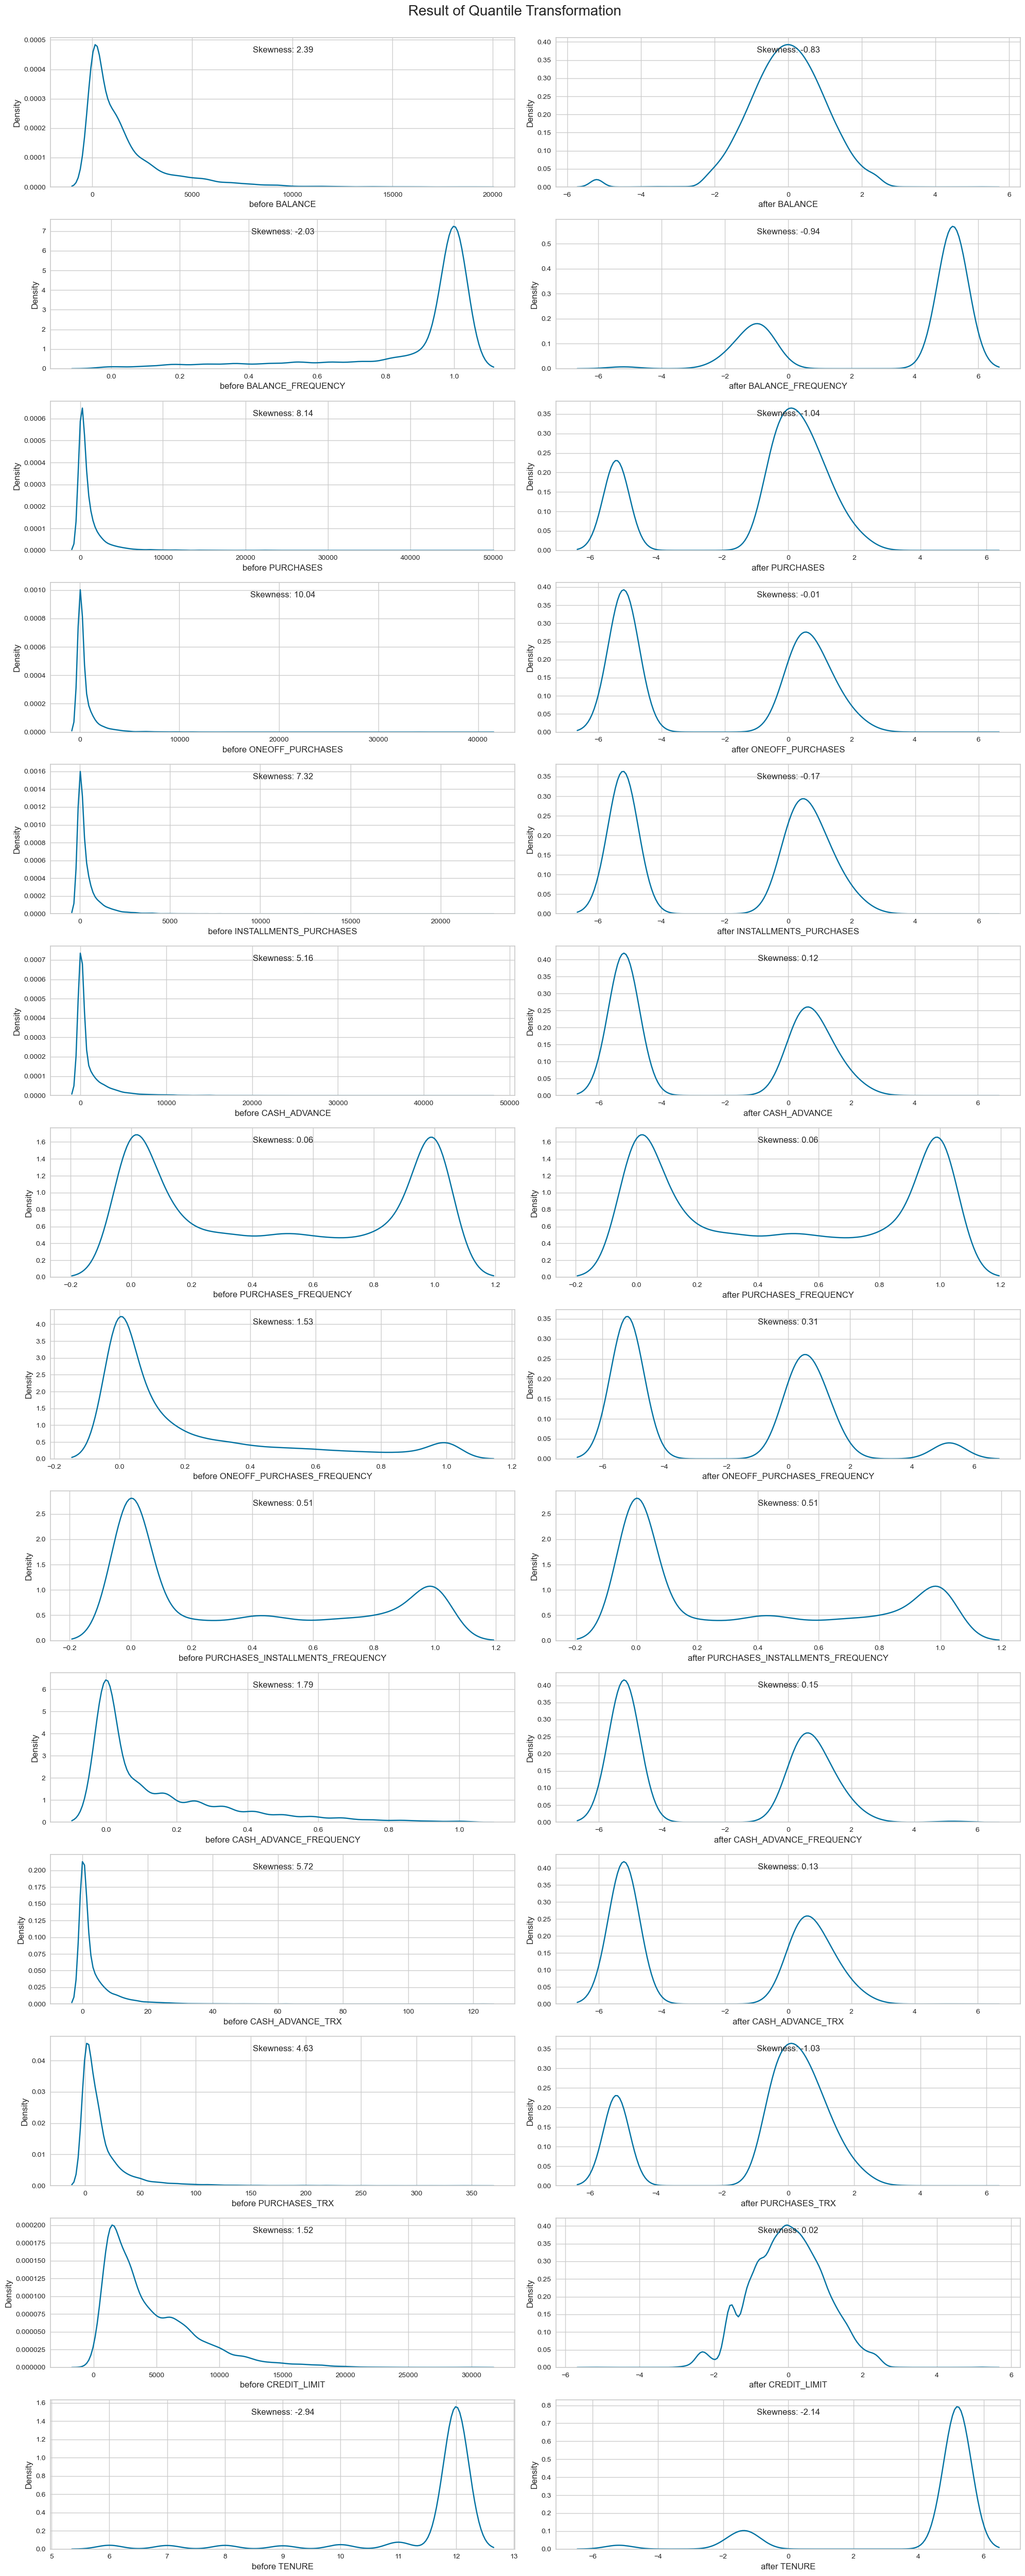

In [40]:
n_cols = 2
n_rows = 14

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 50))

for i, col in enumerate(df_copy.select_dtypes(include=[np.number]).columns):
    sns.kdeplot(data=dt[col], ax=axs[i, 0])
    axs[i, 0].set_xlabel('before ' + col)
    axs[i, 0].set_ylabel('Density')
    skewness_before = dt[col].skew()
    axs[i, 0].text(0.5, 0.9, f"Skewness: {skewness_before:.2f}", transform=axs[i, 0].transAxes, ha='center')
    sns.kdeplot(data=df_copy[col], ax=axs[i, 1])
    axs[i, 1].set_xlabel('after ' + col)
    axs[i, 1].set_ylabel('Density')
    skewness_after = df_copy[col].skew()
    axs[i, 1].text(0.5, 0.9, f"Skewness: {skewness_after:.2f}", transform=axs[i, 1].transAxes, ha='center')

fig.suptitle('Result of Quantile Transformation', fontsize=20, y=1.00)
plt.tight_layout()
plt.show()

In [41]:
df_copy.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'TENURE'],
      dtype='object')

In [42]:
df_copy.isnull().sum()

CUST_ID                              0
BALANCE                             22
BALANCE_FREQUENCY                   22
PURCHASES                           22
ONEOFF_PURCHASES                    22
INSTALLMENTS_PURCHASES              22
CASH_ADVANCE                        22
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY          22
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY              22
CASH_ADVANCE_TRX                    22
PURCHASES_TRX                       22
CREDIT_LIMIT                        22
TENURE                              22
dtype: int64

In [43]:
df_copy_drop = df_copy[df_copy.isnull().any(axis=1)]
df_copy_drop
#dt = dt[~dt['CUST_ID'].isin(df_copy['CUST_ID'])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,TENURE
8928,C19169,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.833333,NaN,NaN,NaN,NaN,NaN
8929,C19170,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
8930,C19171,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.833333,NaN,NaN,NaN,NaN,NaN
8931,C19172,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,NaN,0.666667,NaN,NaN,NaN,NaN,NaN
8932,C19173,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.833333,NaN,NaN,NaN,NaN,NaN
8933,C19174,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.833333,NaN,NaN,NaN,NaN,NaN
8934,C19175,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,0.500000,NaN,NaN,NaN,NaN,NaN
8935,C19176,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.833333,NaN,NaN,NaN,NaN,NaN
8936,C19177,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.833333,NaN,NaN,NaN,NaN,NaN
8937,C19178,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [44]:
df_copy_drop.shape

(22, 15)

In [45]:
dt1 = dt

In [46]:
dt1.shape

(8928, 15)

In [47]:
dt1 = dt1[~dt1['CUST_ID'].isin(df_copy_drop['CUST_ID'])]

In [48]:
dt1.shape

(8906, 15)

In [49]:
df_copy=df_copy.dropna() 

In [50]:
df_copy.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'TENURE'],
      dtype='object')

In [51]:
df_copy.shape

(8906, 15)

**MutiCollinearity Problem**

In [52]:
dtf=df_copy.select_dtypes(include=[np.number])

In [53]:
#PCA
seed = 42
pca = PCA(n_components=2, random_state=seed)
X_pca = pca.fit_transform(dtf)
print("X_PCA shape:", X_pca.shape)

X_PCA shape: (8906, 2)


In [54]:
# Get the components
components = pca.components_

# Define a threshold for feature importance
threshold = 0.4  # Adjust this value as needed

def print_remarkable_features(components, feature_names, threshold):
    for i, component in enumerate(components):
        print(f"Principal Component {i + 1}:")
        
        # Get remarkable features for this component
        remarkable_features = [feature for feature, weight in zip(feature_names, component) if abs(weight) > threshold]
        
        if remarkable_features:
            for feature, weight in zip(feature_names, component):
                if abs(weight) > threshold:
                    print(f"{feature}: {weight:.4f}")
        else:
            print("No remarkable features based on the given threshold.")
        
        print()

print_remarkable_features(components, dtf.columns, threshold)

Principal Component 1:
CASH_ADVANCE: 0.4164
CASH_ADVANCE_FREQUENCY: 0.4190
CASH_ADVANCE_TRX: 0.4157

Principal Component 2:
ONEOFF_PURCHASES: 0.5049
ONEOFF_PURCHASES_FREQUENCY: 0.5547



# K-means

In [55]:
k_range = range(2, 10)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=seed).fit(X_pca)
    kmeans_per_k.append(kmeans)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

C:\Users\torjm\AppData\Local\Temp\ipykernel_8528\2977161516.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


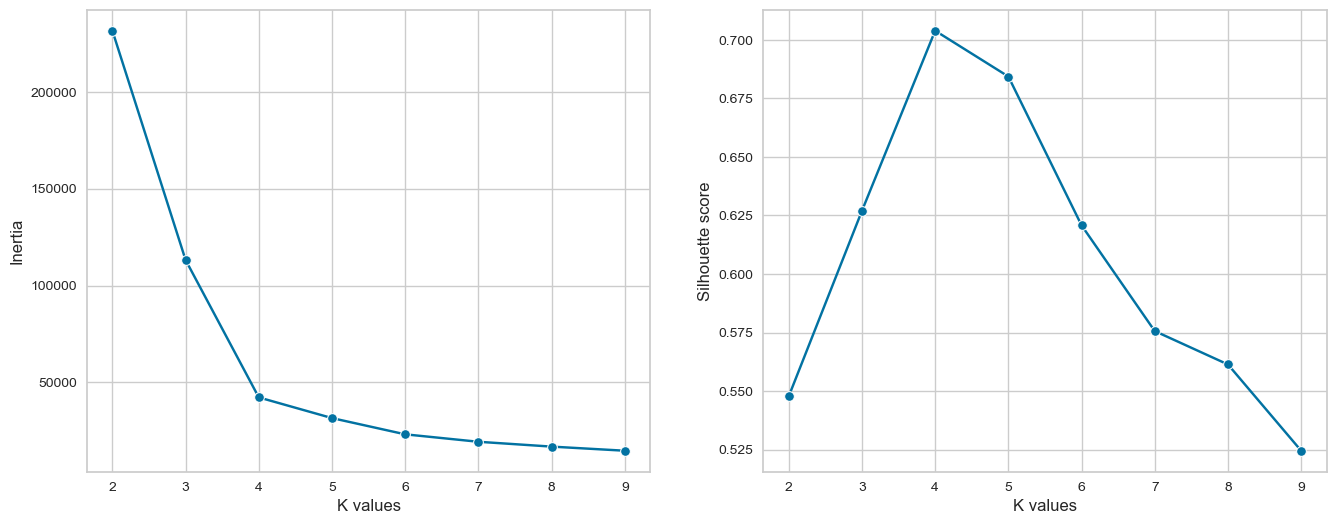

In [56]:
#Elbow method
def plot_optimal_k(kmeans_per_k: list):

    # Inertia
    inertias = [model.inertia_ for model in kmeans_per_k]

    # Silhouette score
    silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k]

    fig, ax = plt.subplots(figsize=(16, 6))
    # Plot elbow score
    plt.subplot(1, 2, 1)
    sns.lineplot(x=k_range, y=inertias, marker="o")
    plt.ylabel("Inertia")
    plt.xlabel("K values")
    
    # Plot silhouette score
    plt.subplot(1, 2, 2)
    sns.lineplot(x=k_range, y=silhouette_scores, marker="o")
    plt.ylabel("Silhouette score")
    plt.xlabel("K values")

    plt.show()

# Calling the function
plot_optimal_k(kmeans_per_k)

In [57]:
best_model = kmeans_per_k[2]
y_kmeans = best_model.predict(X_pca)
print(y_kmeans)

[0 2 3 ... 0 2 1]


Cluster Centroids:


C:\Users\torjm\AppData\Local\Temp\ipykernel_8528\3902398074.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot(2, 2, (3, 4))


,Feature_0,Feature_1
0,-3.205867,-6.324759
1,1.483086,6.564278
2,8.639625,-1.287524
3,-6.582806,0.972710


C:\Users\torjm\AppData\Local\Temp\ipykernel_8528\3902398074.py:46: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


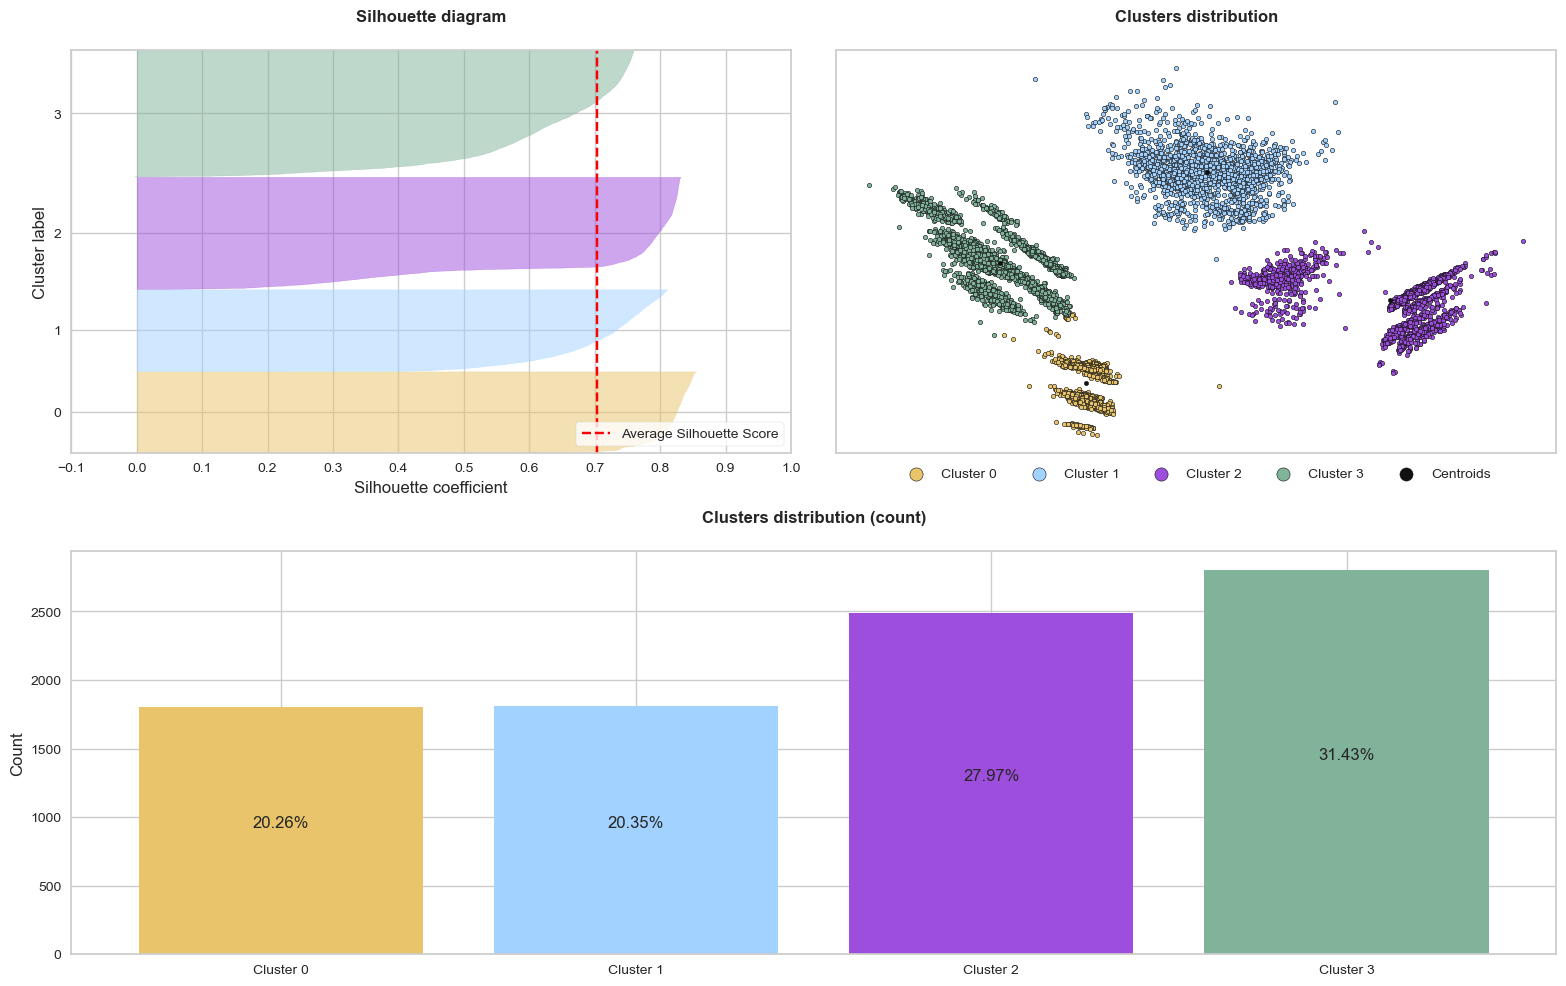

In [58]:

def plot_kmeans_clusters(clusterer, y_kmeans):
    cluster_colors = ["#e9c46a", "#a2d2ff", "#9d4edd", "#81b29a","#81b29d"]
    labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Centroids"]

    # Percentage labels
    unique, counts = np.unique(y_kmeans, return_counts=True)
    count_dict = dict(zip(labels, counts))
    total = sum(count_dict.values())
    label_dict = {key: round(value/total*100, 2) for key, value in count_dict.items()}

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10), layout="constrained")

    # Silhouette plot
    s_viz = SilhouetteVisualizer(clusterer, colors=cluster_colors, ax=ax1)
    s_viz.fit(X_pca)
    s_viz.finalize()
    s_viz.ax.set_title("Silhouette diagram", **title)
    s_viz.ax.set(xlabel="Silhouette coefficient", ylabel="Cluster label")
    s_viz.ax.legend(loc="lower right", frameon=True, fancybox=True, facecolor="w")

    # Scatter plot
    for i in unique:
        ax2.scatter(X_pca[y_kmeans==i, 0], X_pca[y_kmeans==i, 1], c=cluster_colors[i], linewidth=0.4, edgecolor="k", s=10)
    ax2.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], c="k", s=10)
    ax2.set_title("Clusters distribution", **title)
    ax2.set(xticks=[], yticks=[])
    ax2.legend(labels, ncols=len(labels), loc="lower center", bbox_to_anchor=(0.5, -0.1), markerscale=3)
    # Bar plot
    ax3 = plt.subplot(2, 2, (3, 4))
    bars = ax3.bar(x=unique, height=counts, color=cluster_colors)
    ax3.set_title("Clusters distribution (count)", **title)
    ax3.set_ylabel("Count")
    ax3.set_xticks(unique)
    ax3.set_xticklabels(labels[:-1])
    for bar in bars:
        ax3.annotate("{:.2%}".format(bar.get_height() / total), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                xytext=(0, 0), textcoords="offset points", ha="center", va="bottom")
    #addition from me
    centroids = clusterer.cluster_centers_

    # Convert to DataFrame
    centroids_df = pd.DataFrame(centroids, columns=[f"Feature_{i}" for i in range(centroids.shape[1])])
    print("Cluster Centroids:")
    display(centroids_df)

    fig.tight_layout()
    plt.show()

# Calling the function
plot_kmeans_clusters(best_model, y_kmeans)

In [59]:
def clustering_evaluation(X, y_kmeans):
    s_score = np.round(silhouette_score(X, y_kmeans), 3)
    db_score = np.round(davies_bouldin_score(X, y_kmeans), 3)
    ch_score = np.round(calinski_harabasz_score(X, y_kmeans), 3)
    
    # Printing the metrics
    print("Clustering Evaluation")
    print("-"*25)
    print("Silhouette score:", s_score)
    print("Davies-Bouldin index:", db_score)
    print("Calinski-Harabasz index:", ch_score)
    
    # Creating a dataframe with the metrics
    metrics_df = pd.DataFrame({
        'Silhouette Score': [s_score],
        'Davies-Bouldin Index': [db_score],
        'Calinski-Harabasz Index': [ch_score]
    })
    
    return metrics_df

# Example usage
k_means_eval= clustering_evaluation(X_pca, y_kmeans)

Clustering Evaluation
-------------------------
Silhouette score: 0.704
Davies-Bouldin index: 0.393
Calinski-Harabasz index: 34181.557


In [60]:
dx={'cluster':y_kmeans}
res1=pd.DataFrame(dx)
res2=pd.DataFrame(df_copy['CUST_ID'])
result = pd.concat([res2, res1], axis=1)

In [61]:
result.head()

,CUST_ID,cluster
0,C10001,0.0
1,C10002,2.0
2,C10003,3.0
3,C10004,1.0
4,C10005,3.0


In [62]:
cluster0=result[result['cluster']==0]
cluster1=result[result['cluster']==1]
cluster2=result[result['cluster']==2]
cluster3=result[result['cluster']==3]
cluster_0 = pd.merge(cluster0, dt1, on='CUST_ID', how='inner')
cluster_1 = pd.merge(cluster1, dt1, on='CUST_ID', how='inner')
cluster_2 = pd.merge(cluster2, dt1, on='CUST_ID', how='inner')
cluster_3 = pd.merge(cluster3, dt1, on='CUST_ID', how='inner')

In [63]:
cluster_0.head()

,CUST_ID,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,TENURE
0,C10001,0.0,40.900749,0.818182,95.40,0.0,95.40,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,12
1,C10006,0.0,1809.828751,1.000000,1333.28,0.0,1333.28,0.0,0.666667,0.0,0.583333,0.0,0,8,1800.0,12
2,C10008,0.0,1823.652743,1.000000,436.20,0.0,436.20,0.0,1.000000,0.0,1.000000,0.0,0,12,2300.0,12
3,C10011,0.0,1293.124939,1.000000,920.12,0.0,920.12,0.0,1.000000,0.0,1.000000,0.0,0,12,1200.0,12
4,C10018,0.0,41.089489,0.454545,519.00,0.0,519.00,0.0,0.416667,0.0,0.333333,0.0,0,8,2500.0,12


In [64]:
cluster_avg_0 = cluster_0.drop(columns=['CUST_ID','cluster'])
cluster_avg_1 = cluster_1.drop(columns=['CUST_ID','cluster'])
cluster_avg_2 = cluster_2.drop(columns=['CUST_ID','cluster'])
cluster_avg_3 = cluster_3.drop(columns=['CUST_ID','cluster'])
cluster_avg_0.head()

cluster_stats = pd.DataFrame({
    'cluster0_mean': cluster_avg_0.mean(),
    'cluster0_median': cluster_avg_0.median(),
    'cluster0_max': cluster_avg_0.max(),
    'cluster0_min': cluster_avg_0.min(),
    
    'cluster1_mean': cluster_avg_1.mean(),
    'cluster1_median': cluster_avg_1.median(),
    'cluster1_max': cluster_avg_1.max(),
    'cluster1_min': cluster_avg_1.min(),
    
    'cluster2_mean': cluster_avg_2.mean(),
    'cluster2_median': cluster_avg_2.median(),
    'cluster2_max': cluster_avg_2.max(),
    'cluster2_min': cluster_avg_2.min(),
    
    'cluster3_mean': cluster_avg_3.mean(),
    'cluster3_median': cluster_avg_3.median(),
    'cluster3_max': cluster_avg_3.max(),
    'cluster3_min': cluster_avg_3.min()
})

cluster_stats

# all_cluster_average=pd.DataFrame({'cluster0':cluster_avg_0.mean(),'cluster1':cluster_avg_1.mean(),'cluster2':cluster_avg_2.mean(),'cluster3':cluster_avg_3.mean()})
# all_cluster_average

,cluster0_mean,cluster0_median,cluster0_max,cluster0_min,cluster1_mean,cluster1_median,cluster1_max,cluster1_min,cluster2_mean,cluster2_median,cluster2_max,cluster2_min,cluster3_mean,cluster3_median,cluster3_max,cluster3_min
BALANCE,1329.426633,670.120718,11964.83264,0.0,1754.285116,1023.323593,16304.88925,0.0,1569.643308,865.161494,15258.22590,0.0,1610.035529,916.961442,19043.13856,0.0
BALANCE_FREQUENCY,0.856554,1.000000,1.00000,0.0,0.887386,1.000000,1.00000,0.0,0.879572,1.000000,1.00000,0.0,0.883529,1.000000,1.00000,0.0
PURCHASES,943.303979,317.400000,40040.71000,0.0,1084.954959,413.700000,49039.57000,0.0,855.877069,323.710000,38902.71000,0.0,1133.180728,405.930000,41050.40000,0.0
ONEOFF_PURCHASES,526.604853,0.000000,34087.73000,0.0,661.745814,89.040000,40761.25000,0.0,499.587519,0.000000,33803.84000,0.0,682.861309,85.500000,40624.06000,0.0
INSTALLMENTS_PURCHASES,416.699126,108.750000,15497.19000,0.0,423.209144,93.340000,12738.47000,0.0,356.289550,70.000000,7571.40000,0.0,450.319419,89.370000,22500.00000,0.0
CASH_ADVANCE,895.244221,0.000000,26268.69989,0.0,1065.634606,73.693002,27296.48576,0.0,1065.403853,19.094068,47137.21176,0.0,911.948170,0.000000,29282.10915,0.0
PURCHASES_FREQUENCY,0.493214,0.500000,1.00000,0.0,0.495575,0.500000,1.00000,0.0,0.475229,0.416667,1.00000,0.0,0.496033,0.500000,1.00000,0.0
ONEOFF_PURCHASES_FREQUENCY,0.166318,0.000000,1.00000,0.0,0.224334,0.083333,1.00000,0.0,0.188465,0.000000,1.00000,0.0,0.227069,0.083333,1.00000,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.386536,0.250000,1.00000,0.0,0.361527,0.166667,1.00000,0.0,0.356696,0.166667,1.00000,0.0,0.356482,0.166667,1.00000,0.0
CASH_ADVANCE_FREQUENCY,0.127818,0.000000,1.00000,0.0,0.143834,0.083333,1.00000,0.0,0.141533,0.083333,1.00000,0.0,0.128750,0.000000,1.00000,0.0


In [65]:
def search_old_cust_id(cust_id):
    x=result[result['CUST_ID']==cust_id]
    return x['cluster'].iloc[0]

In [66]:
search_old_cust_id('C10004')

1.0

In [67]:
from joblib import dump
dump(best_model, 'model.pkl')

['model.pkl']

In [68]:
from joblib import dump
dump(pca, 'pca.pkl')

['pca.pkl']

In [69]:
from joblib import dump
dump(pt, 'QuantileTransformer.pkl')

['QuantileTransformer.pkl']

In [70]:
def predict(d):
    #PCA
    a=d['CUST_ID']
   # seed = 42
    #pca = PCA(n_components=2, random_state=seed)
    d_pca = pca.fit_transform(d)
    y = best_model.predict(d_pca)
    dx={'cluster':y}
    res1=pd.DataFrame(dx)
    res2=pd.DataFrame(a)
    res = pd.concat([res2, res1], axis=1)
    result = result.append(res, ignore_index=True)
    return search_old_cust_id(a)

# Hierachical Clustering

In [160]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

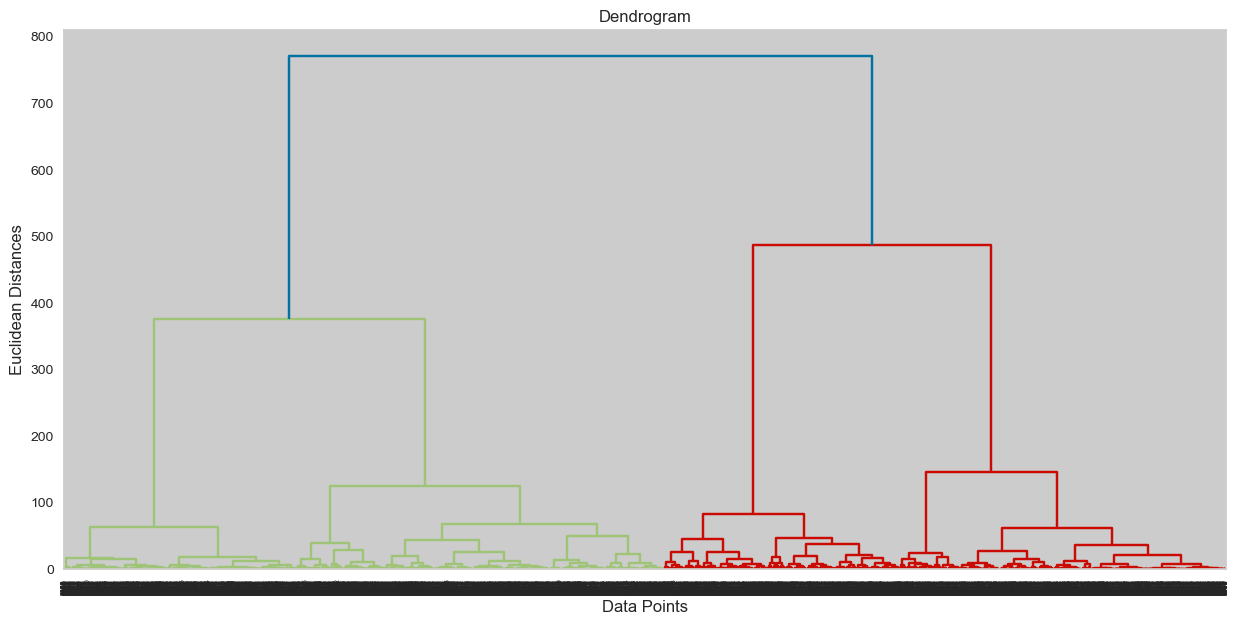

In [161]:
# Plotting the dendrogram
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [175]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_hc = hc.fit_predict(X_pca)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


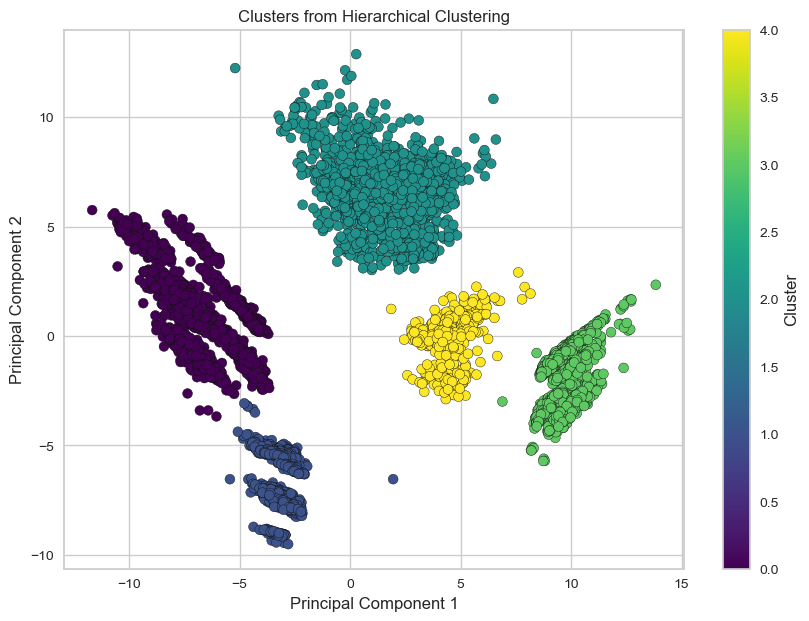

In [176]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", as_cmap=True)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hc, cmap=palette, edgecolor="k", s=50)
plt.title("Clusters from Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar().set_label('Cluster')
plt.show()

In [179]:
HC_eval= clustering_evaluation(X_pca,labels_hc)

Clustering Evaluation
-------------------------
Silhouette score: 0.685
Davies-Bouldin index: 0.415
Calinski-Harabasz index: 35024.126


# Gaussian mixture

In [91]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm_clusters = gmm.fit_predict(X_pca)

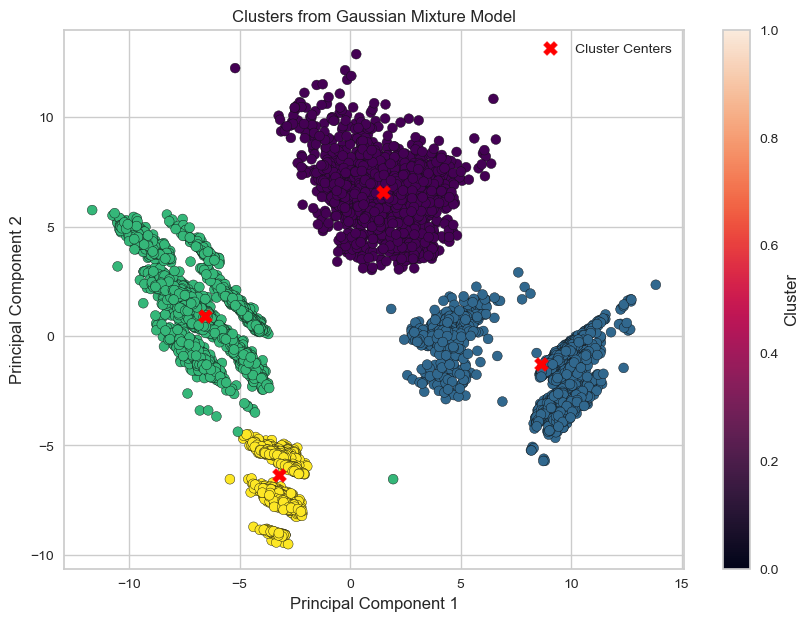

In [92]:
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", as_cmap=True)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_clusters, cmap=palette, edgecolor="k", s=50)

# Plotting cluster centers (means of the Gaussian distributions in GMM)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Set title and labels
plt.title("Clusters from Gaussian Mixture Model")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar().set_label('Cluster')
plt.legend()

# Show the plot
plt.show()

In [178]:
GM_eval=clustering_evaluation(X_pca, gmm_clusters)

Clustering Evaluation
-------------------------
Silhouette score: 0.704
Davies-Bouldin index: 0.393
Calinski-Harabasz index: 33988.488


poor result

# Spectral Clustering

In [109]:
from sklearn.cluster import SpectralClustering

In [108]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
labels_spectral = spectral.fit_predict(X_pca)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


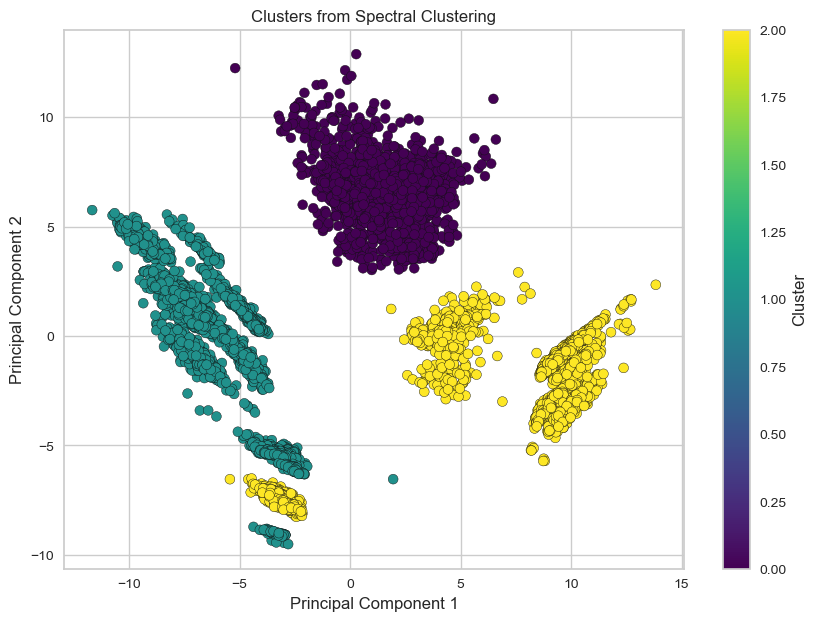

In [110]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", as_cmap=True)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_spectral, cmap=palette, edgecolor="k", s=50)
plt.title("Clusters from Spectral Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar().set_label('Cluster')
plt.show()

In [181]:
SC_eval=clustering_evaluation(X_pca, labels_spectral)

Clustering Evaluation
-------------------------
Silhouette score: 0.502
Davies-Bouldin index: 0.728
Calinski-Harabasz index: 8405.158


# DBSCAN

In [117]:
from sklearn.cluster import DBSCAN

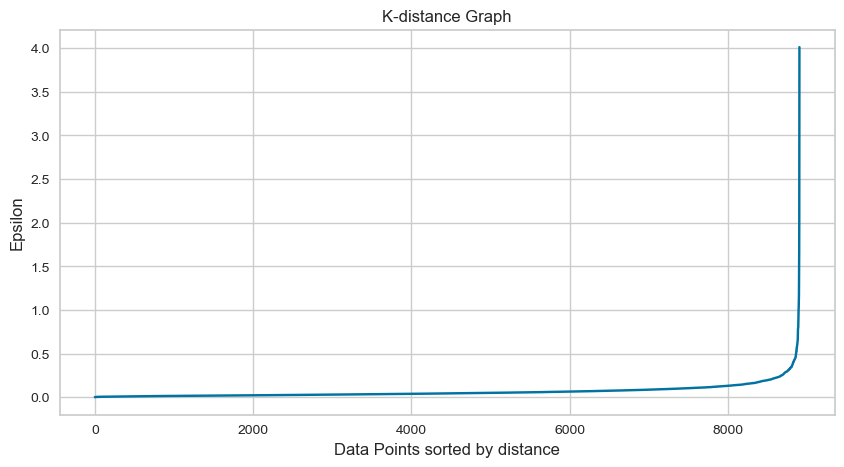

In [118]:
from sklearn.neighbors import NearestNeighbors

# Find the average distance to the 3rd nearest neighbor
nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)

# Sort the distances
distances = np.sort(distances[:,2], axis=0)

# Plot
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [157]:
dbscan = DBSCAN(eps=0.7 , min_samples=4)
labels_dbscan = dbscan.fit_predict(X_pca)

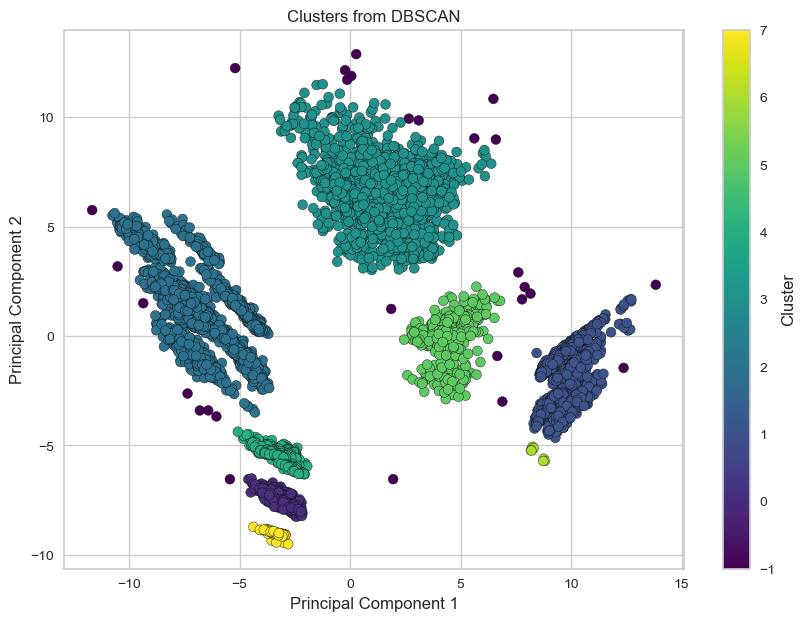

In [158]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", as_cmap=True)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap=palette, edgecolor="k", s=50)
plt.title("Clusters from DBSCAN")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar().set_label('Cluster')
plt.show()

In [183]:
DBSCAN_eval=clustering_evaluation(X_pca, labels_dbscan)

Clustering Evaluation
-------------------------
Silhouette score: 0.595
Davies-Bouldin index: 1.671
Calinski-Harabasz index: 17784.633


# Global Evaluation of models

In [184]:
dfs = [k_means_eval, HC_eval, GM_eval, SC_eval, DBSCAN_eval]

# Concatenate
Global_eval = pd.concat(dfs, ignore_index=True, axis=0)

# Optionally, if you want to add a new column specifying the clustering method for each row:
methods = ['KMeans', 'Hierarchical', 'GaussianMixture', 'Spectral', 'DBSCAN']
Global_eval['Method'] = np.repeat(methods, repeats=[len(df) for df in dfs])
# Rearrange the columns to have 'Method' as the first column
cols = ['Method'] + [col for col in Global_eval if col != 'Method']
Global_eval = Global_eval[cols]

In [185]:
Global_eval

,Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,KMeans,0.704,0.393,34181.557
1,Hierarchical,0.685,0.415,35024.126
2,GaussianMixture,0.704,0.393,33988.488
3,Spectral,0.502,0.728,8405.158
4,DBSCAN,0.595,1.671,17784.633


In [186]:
def highlight_row(s, row_index, color='yellow'):
    return ['background-color: {}'.format(color) if i == row_index else '' for i in range(len(s))]

# Display with row 1 highlighted
Global_eval.style.apply(highlight_row, row_index=0, color='lightblue', axis=0)

,Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,KMeans,0.704000,0.393000,34181.557000
1,Hierarchical,0.685000,0.415000,35024.126000
2,GaussianMixture,0.704000,0.393000,33988.488000
3,Spectral,0.502000,0.728000,8405.158000
4,DBSCAN,0.595000,1.671000,17784.633000
